In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
style.use('ggplot')

data = pd.read_csv('./Iris-two-label.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# preparing data
x1 = data['SepalLengthCm'].values
x2 = data['PetalLengthCm'].values
y = data['Species'].values

#X,Y and bias term
# bias = np.negative(np.ones(len(x1)))
bias = np.full(len(x1),-1)
X = np.array(list(zip(x1,x2)))
# print(X)

#Nominal to numeric
df = pd.DataFrame(data=y, dtype='category', columns=['label'])
Y = df['label'].cat.codes
Y = np.array(Y)
Y[Y == 0 ] = -1

C:\Users\JIN\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full(100, -1) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [3]:
class Support_Vector_Machine:
    def __init__(self,  train_data, label, visualization=True):
        self.data_plot = train_data
        self.data = train_data
        self.label = label
        self.instances = len(self.data)
        
        self.visualization = visualization
        self.colors = {1:'r' , -1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
#   fit
    def train(self):
        # { ||w||: [w,b]} | basically its a magnitude of w
        opt_dict = {}
        
        
        
        transforms = [[1,1],
                     [-1,1],
                     [-1,-1],
                     [1,-1]]
        
        #basically just merge X and Y to find max and min feature value
        all_data = []
#         for yi in self.data:
#             for featureset in self.data[yi]:
#                 for feature in featureset:
#                     all_data.append(feature)
        
        for points in self.data:
            for val in points:
                all_data.append(val)
        
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense
                      self.max_feature_value * 0.01]
        
        #extremely expensive
        b_range_multiple = 5
        
        b_multiple = 5
        
        latest_optimum = self.max_feature_value * 10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            
            # convex can detect when it is optimized
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple), 
                                   self.max_feature_value*b_range_multiple, 
                                   step*b_multiple):
                    
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True
                        # weakest link in the SVM Fundamentally
                        # SMO attempts to fix this a bit
                        # constraint : yi(wi.w+b) > = 1
                        
                        for i in range(0, self.instances):
                            yi = self.label[i]
                            xi = self.data[i]
                            if not yi*(np.dot(xi,w_t)+b) >= 1:
                                found_option = False
                                break
                        
#                         for i in self.data:
#                             for xi in self.data[i]:
#                                 yi = i
#                                 if not yi*(np.dot(xi,w_t)+b) >= 1:
#                                     found_option = False
#                                     break
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                
                if w[0] < 0 :
                    optimized = True
                    print ('Optimized a step.')
                else:
                    w = w - step
                    
            #as if distance / magnitude
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            #||w|| : [w,b]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step * 2
            
    def predict(self, X, Y):
        # sign(x.w+b) | x is the unknown feature set
        
        feature = [X,Y]
        classification = np.sign(np.dot(np.array(feature), self.w)+self.b)
        if classification !=0 and self.visualization:
            #self.ax.scatter(feature[0], feature[1], s=50, marker='*', c=self.colors[classification])
            self.ax.scatter(feature[0], feature[1], s=50, marker='*', c='#f39c12')
        
        return classification
    
    # VISUALIZATION
    def visualize(self):
        [self.ax.scatter(self.data_plot[i,0],self.data_plot[i,1],s=20,color=self.colors[self.label[i]]) for i in range(0,self.instances)]
        
        
        # hyperplane = x.w+b
        # v = x.w+b | pos =1 , neg = -1 , dec = 0
        def hyperplane(x,w,b,v):            
            return (-w[0]*x-b+v) / w[1]
        
        # So the plotting wont go till the edge, its like padding
        datarange = (self.min_feature_value*0.9 , self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x+b) = 1
        # positive suport vector hyperplane
        psv1 = hyperplane(hyp_x_min , self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max , self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2])
        
        # (w.x+b) = -1
        # positive suport vector hyperplane
        nsv1 = hyperplane(hyp_x_min , self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max , self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2])
        
        # (w.x+b) = 0
        # positive suport vector hyperplane
        db1 = hyperplane(hyp_x_min , self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max , self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2])
        
        plt.xlabel('Sepal Length (cm)')
        plt.ylabel('Petal Length (cm)')
        plt.title('Support Vector Machine \nIris Prediction')
        plt.show()
    

In [4]:
# data_dict = {-1:np.array([[1,7],
#                      [2,8],
#                      [3,8],]),
             
#              1:np.array([[5,1],
#                          [6,-1],
#                          [7,3],])}

# tutorial data

In [5]:
svm = Support_Vector_Machine(X,Y)
svm.train()


Optimized a step.
Optimized a step.
Optimized a step.


In [6]:
svm.predict(3,1)
svm.predict(1,3)

1.0

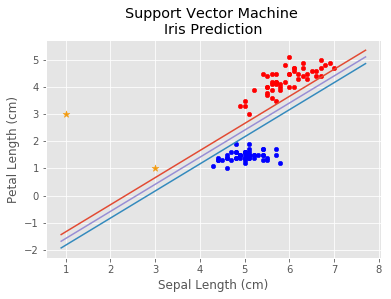

In [7]:
svm.visualize()
